# REGRESSION

## SINGLE LINEAR, MULTIPLE LINEAR and POLYNOMIAL REGRESSION

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
data = pd.read_csv('Housing.csv')

In [136]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [137]:
data.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [138]:
# mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea and basement are binary values.Converting True to 1 and False to 0.
data['mainroad'] = data['mainroad'].replace({'no': 0, 'yes': 1})
data['guestroom'] = data['guestroom'].replace({'no': 0, 'yes': 1})
data['hotwaterheating']  = data['hotwaterheating'].replace({'no': 0, 'yes': 1})
data['airconditioning'] = data['airconditioning'].replace({'no': 0, 'yes': 1})
data['prefarea'] = data['prefarea'].replace({'no': 0, 'yes': 1})
data['basement'] = data['basement'].replace({'no': 0, 'yes' : 1})

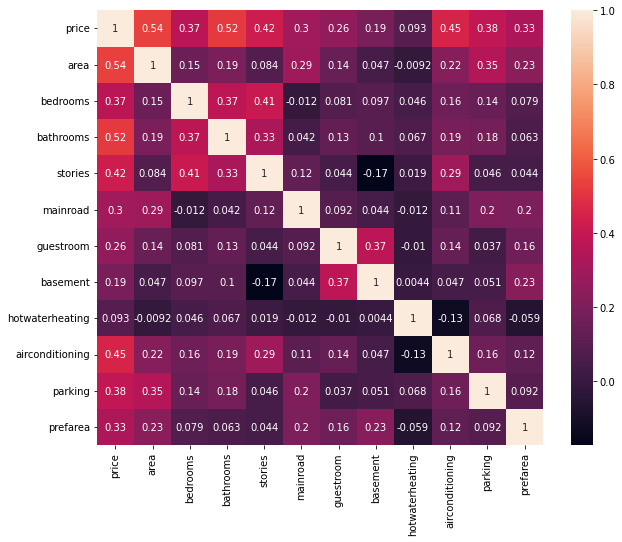

In [139]:
# Correlation Heatmap
plt.figure(figsize=[10,8])
ax = sns.heatmap(data.corr(), annot = True) 

In [140]:
# From the correlation heatmap we can see that hotwaterheating is not much useful for price prediction. We can drop hotewatering
data = data.drop(['hotwaterheating'],axis = 1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,1,2,0,furnished


# SIMPLE LINEAR REGRESSION

### In the correlation heatmap above we can see that price is higly correlated with the area of the house. Lets build a SIMPLE LINEAR REGRESSION MODEL considering area and price of the house.

In [141]:
SLR = data[['area','price']]

In [142]:
msk = np.random.rand(len(SLR)) < 0.75
train = SLR[msk]
test = SLR[~msk]

In [143]:
train_x = np.asanyarray(train[['area']])
train_y = np.asanyarray(train[['price']])

In [144]:
# With Library - Sklearn
from sklearn import linear_model
SLregr = linear_model.LinearRegression()
SLregr.fit(train_x, train_y)

# The coefficients

m = SLregr.coef_
c = SLregr.intercept_

y = m * train_x + c

print ('Coefficients: ', m,'\nIntercept: ',c)


Coefficients:  [[433.57924989]] 
Intercept:  [2496255.47711575]


In [145]:
#Without Library - Step by step
train_x_avg = np.average(train_x)
train_y_avg = np.average(train_y)

# m = slope : c = y_intercept : y = mx + c
m_1 = np.sum((train_x - train_x_avg) * (train_y - train_y_avg)) / np.sum((train_x - train_x_avg)**2)
c_1 = train_y_avg - m * train_x_avg 

y_1 = m_1 * train_x + c_1 

print('Coefficients :',m_1,'\nIntercept :',c_1)

Coefficients : 433.5792498917114 
Intercept : [[2496255.47711575]]


Text(0, 0.5, 'Price')

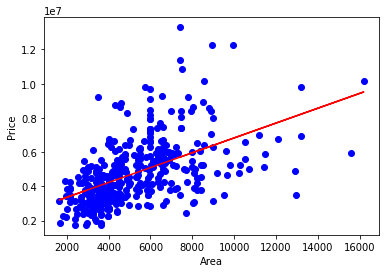

In [146]:
# With Library - Scatter plot with regression line built with using inbuilt library sklearn
plt.scatter(train.area, train.price,  color='blue')
plt.plot(train_x,y, '-r')
plt.xlabel("Area")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

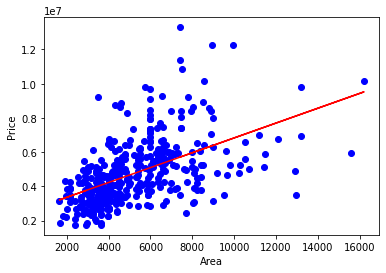

In [147]:
#Without Library - Scatter plot with regression line built without using inbuilt library sklearn
plt.scatter(train.area, train.price,  color='blue')
plt.plot(train_x,y_1, '-r')
plt.xlabel("Area")
plt.ylabel("Price")

In [148]:
#Calculated the accuracy of the model, where the model is built with the use of sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

test_x = np.asanyarray(test[['area']])
test_y = np.asanyarray(test[['price']])
test_y_ = SLregr.predict(test_x)

print('Mean absolute error (MAE) :',MAE(test_y_,test_y))
print('Residual sum of squares (MSE) :',MSE(test_y_,test_y))
print('R2-score:',r2_score(test_y , test_y_) )

Mean absolute error (MAE) : 1163077.7822850863
Residual sum of squares (MSE) : 2365871803401.7773
R2-score: 0.3034792008341234


In [149]:
#Caluclated the accuracy of the model, where the model is built without any libraries
y_t = m_1 * test_x + c_1
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - y_t)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - y_t) ** 2))
print("R2-score: %.2f" % (1 - np.sum((test_y - y_t)**2) / np.sum((test_y - train_y_avg)**2)))

Mean absolute error: 1163077.78
Residual sum of squares (MSE): 2365871803401.78
R2-score: 0.31


In [150]:
# Output of Model built with Library
x_in = int(input('Enter the area :'))
y_out = m* x_in + c
y_out = int(np.round(y_out))
print(y_out, 'is the estimated price of the house considering the area.')

Enter the area :5000
4664152 is the estimated price of the house considering the area.


In [151]:
# Output of model built without Library
x_in = int(input('Enter the area :'))
y_1 = m_1 * x_in + c_1
y_out = int(np.round(y_1))
print(y_out, 'is the estimated price of the house considering the area.')

Enter the area :5000
4664152 is the estimated price of the house considering the area.


# MULTIPLE LINEAR REGRESSION

### Let us consider multiple independent variables and build a REGRESSION MODEL

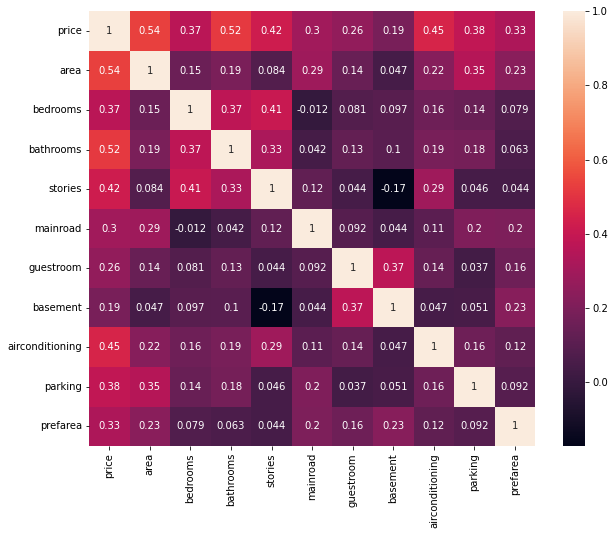

In [152]:
plt.figure(figsize=[10,8])
ax = sns.heatmap(data.corr(), annot = True)

### Let us consider parking,airconditioning, stories, bathrooms, bedrooms and area as Independent variables as the correlation values of these variables are greater than 0.35 with respect to price - Dependent Variable 

In [153]:
MLR = data[['parking','airconditioning','stories','bathrooms','bedrooms','area','price']]
MLR.head()

,parking,airconditioning,stories,bathrooms,bedrooms,area,price
0,2,1,3,2,4,7420,13300000
1,3,1,4,4,4,8960,12250000
2,2,0,2,2,3,9960,12250000
3,3,1,2,2,4,7500,12215000
4,2,1,2,1,4,7420,11410000


In [154]:
msk = np.random.rand(len(SLR)) < 0.75
train = MLR[msk]
test = MLR[~msk]

train_x = np.asanyarray(train[['area','parking','airconditioning','stories','bathrooms','bedrooms']])
train_y = np.asanyarray(train[['price']])

test_x = np.asanyarray(test[['area','parking','airconditioning','stories','bathrooms','bedrooms']])
test_y = np.asanyarray(test[['price']])

In [155]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(406, 6)
(406, 1)
(139, 6)
(139, 1)


In [156]:
MLregr = linear_model.LinearRegression()
x = np.asanyarray(train_x)
y = np.asanyarray(train_y)
MLregr.fit (x, y)

# The coefficients
m = MLregr.coef_
c = MLregr.intercept_

y = m * train_x + c

print ('Coefficients: ', m,'\nIntercept: ',c)

Coefficients:  [[3.08108973e+02 3.31677829e+05 8.75585714e+05 4.46717448e+05
  9.55511068e+05 2.20462907e+05]] 
Intercept:  [-44048.53499196]


In [157]:
y_t = MLregr.predict(test_x)

In [158]:
print('Mean absolute error (MAE) :',MAE(test_y,y_t))
print('Residual sum of squares (MSE) :',MSE(test_y,y_t))
print('R2-score:',r2_score(test_y , y_t) )

Mean absolute error (MAE) : 809511.9549640125
Residual sum of squares (MSE) : 1072738441007.6864
R2-score: 0.6891781041112126


In [159]:
x_in = []
a = ['area','parking','airconditioning','stories','bathrooms','bedrooms']
for i in a:
    b = int(input(i+' : '))
    x_in.append(b)
print('')    
x_in = np.asanyarray(x_in)
x_in = x_in.reshape(1,x_in.shape[0])
    
y_out = MLregr.predict(x_in)
y_out = int(np.round(y_out))
print(y_out,' is the estimated price of the house considering the attributes : Area, Parking, Airconditioning, Stories, Bathrooms and Bedrooms.')

area : 5000
parking : 2
airconditioning : 2
stories : 2
bathrooms : 2
bedrooms : 2

7156406  is the estimated price of the house considering the attributes : Area, Parking, Airconditioning, Stories, Bathrooms and Bedrooms.


## We are getting a better result when we consider multiple attributes for training the regression model.

# POLYNOMIAL REGRESSION

In [160]:
from sklearn.preprocessing import PolynomialFeatures

PNR = data[['area','price']]

msk = np.random.rand(len(PNR)) < 0.75
train = PNR[msk]
test = PNR[~msk]

train_x_polys = np.asanyarray(train[['area']])
train_y_poly = np.asanyarray(train[['price']])

test_x_polys = np.asanyarray(test[['area']])
test_y_poly = np.asanyarray(test[['price']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x_polys)
test_x_poly = poly.fit_transform(test_x_polys)

In [161]:
PNRegr = linear_model.LinearRegression()
PNRegr.fit(train_x_poly, train_y_poly)

# The coefficients
print ('Coefficients: ', PNRegr.coef_)
print ('Intercept: ',PNRegr.intercept_)


y_t = PNRegr.predict(test_x_poly)

Coefficients:  [[ 0.00000000e+00  9.62053806e+02 -3.65949673e-02]]
Intercept:  [914442.04502832]


In [162]:
print('Mean absolute error (MAE) :',MAE(test_y_poly,y_t))
print('Residual sum of squares (MSE) :',MSE(test_y_poly,y_t))
print('R2-score:',r2_score(test_y_poly , y_t) )

Mean absolute error (MAE) : 1149344.898520622
Residual sum of squares (MSE) : 2487800372576.4673
R2-score: 0.2681667805715213


Text(0, 0.5, 'Price')

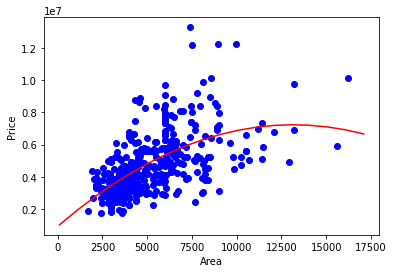

In [163]:
plt.scatter(train.area, train.price,  color='blue')
XX = np.arange(100, 17500, 1000)
yy = PNRegr.intercept_[0]+ PNRegr.coef_[0][1]*XX + PNRegr.coef_[0][2]*np.power(XX, 2) #+ clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Area")
plt.ylabel("Price")

In [164]:
x_in = int(input('Enter the area :'))
x_in = np.array(x_in)
x_in = x_in.reshape(1,1)
y = PNRegr.predict(poly.fit_transform(x_in))
y_out = int(np.round(y))
print(y_out, 'is the estimated price of the house considering the area.')

Enter the area :5000
4809837 is the estimated price of the house considering the area.


## Considering the accuracies of SIMPLE, MULTIPLE AND POLYNOMIAL Regression :

### Simple Linear Regression : 
Mean absolute error: 1163077.78
,Residual sum of squares (MSE): 2365871803401.78
,R2-score: 0.31

### Multiple Linear Regression : 
Mean absolute error (MAE) : 809511.9549640125
,Residual sum of squares (MSE) : 1072738441007.6864
,R2-score: 0.6891781041112126

### Polyomial Regression : 
Mean absolute error (MAE) : 1149344.898520622
,Residual sum of squares (MSE) : 2487800372576.4673
,R2-score: 0.2681667805715213


## We can coclude that MLTIPLE LINEAR REGRESSION provides better accuracy.